## Forecasting stock prices by denoising of signals with wavelets
#### Article reference: http://hdl.handle.net/10419/36698

### Ensure correct path

In [1]:
import os
os.getcwd()

'/Users/Cisco/Desktop/Master_Dauphine/M2_IEF/cours/semestre2/risque_multifreq/projet/src/exploratory_notebooks'

In [2]:
os.chdir('../')
os.getcwd()

'/Users/Cisco/Desktop/Master_Dauphine/M2_IEF/cours/semestre2/risque_multifreq/projet/src'

### Modules

In [3]:
import numpy as np
import pandas as pd
pd.options.display.float_format = "{:,.4f}".format
import matplotlib.pyplot as plt
%matplotlib inline
import pywt

### Import data

In [4]:
db = pd.read_excel(io="data/db_us_equity.xlsx").set_index("Date")

In [5]:
db.head()

,PX_LAST,PX_VOLUME
Date,,
2020-04-03,5.9000,4594293
2020-04-02,6.0200,6539395
2020-04-01,5.9600,5716223
2020-03-31,6.4200,5113991
2020-03-30,6.5100,5937723


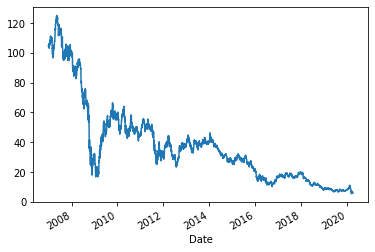

In [6]:
db["PX_LAST"].plot()

In [7]:
# Conform dataset to article
from production_code import constants

In [8]:
db = db.loc[db.index <= constants.NON_POW_END_DATE]
db = db.loc[db.index >= constants.NON_POW_START_DATE]

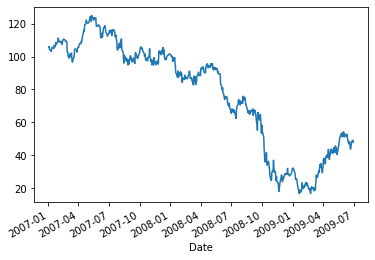

In [9]:
db["PX_LAST"].plot()

<b>Compute the returns</b>

In [10]:
db["LOG_RETURNS"] = np.log(db["PX_LAST"]) - np.log(db["PX_LAST"].shift(-1))

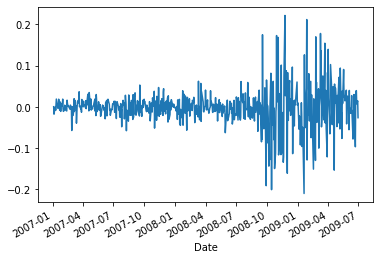

In [11]:
db["LOG_RETURNS"].plot()

## Denoise the signal (prices)

In [12]:
db.head()

,PX_LAST,PX_VOLUME,LOG_RETURNS
Date,,,
2009-06-30,47.7734,1283022,-0.0262
2009-06-29,49.0421,914565,0.0145
2009-06-26,48.3373,1190272,0.0073
2009-06-25,47.9848,1905159,0.0394
2009-06-24,46.1287,1673465,0.0381


<b>Discretise the scale grid c.f. (3.3)</b>

### Discrete wavelets: Haar and Daubechies D4

In [39]:
y = db["PX_LAST"]
nLevel = 6
sigma = 0.1
threshold  = sigma * np.sqrt(2 * np.log(4 * (1 - pow(2, -nLevel))))

In [40]:
haar = pywt.Wavelet(name="haar")
daubechies = pywt.Wavelet(name="db4")

In [41]:
coeffs = pywt.wavedec(y, haar, mode='per', level=nLevel)

<b>Implement the threshold</b>

In [42]:
[len(x) for x in coeffs]

[10, 10, 20, 40, 79, 157, 314]

In [ ]:
def denoiseCoeffs(method: string, coeffs: list) -> list:
    newCoeffs = list()
    threshold = computeThreshold()
    for arr in coeffs:
        arr[]